<a href="https://colab.research.google.com/github/Praveenrpw/AI_ModelLab/blob/main/flight_fare_prediction/flight_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/flight_fare_prediction/flight_data.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df = df.drop('Unnamed: 0', axis = 1)

In [ ]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [ ]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [ ]:
df.corr(numeric_only = True).T

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [ ]:
df.shape

(300153, 11)

In [ ]:
df1 = df.groupby(['airline','flight'], as_index=False).count()
df1.airline.value_counts()

,count
airline,
Indigo,704
Air_India,218
GO_FIRST,205
SpiceJet,186
Vistara,133
AirAsia,115


Indigo becomes the most popular airline by visualize on countplot

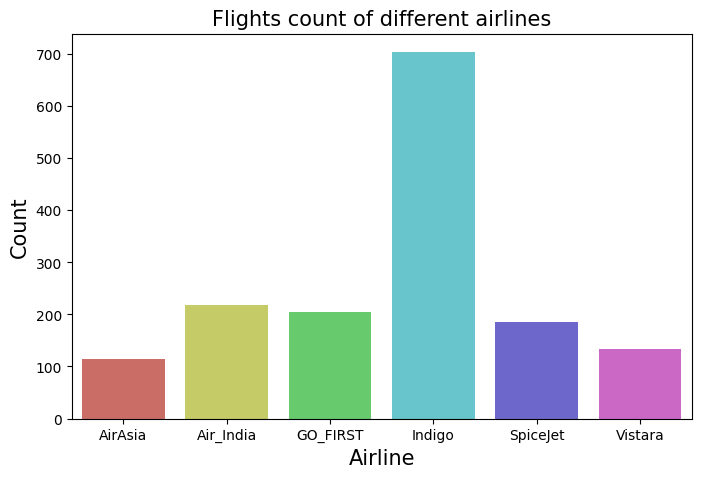

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'airline', data=df1, palette = 'hls')
plt.title('Flights count of different airlines', fontsize = 15)
plt.xlabel('Airline', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [ ]:
df2 = df.groupby(['airline', 'flight', 'class'], as_index=False).count()
df2['class'].value_counts()

,count
class,
Economy,1560
Business,295


Most of the Airlines has economic class as common

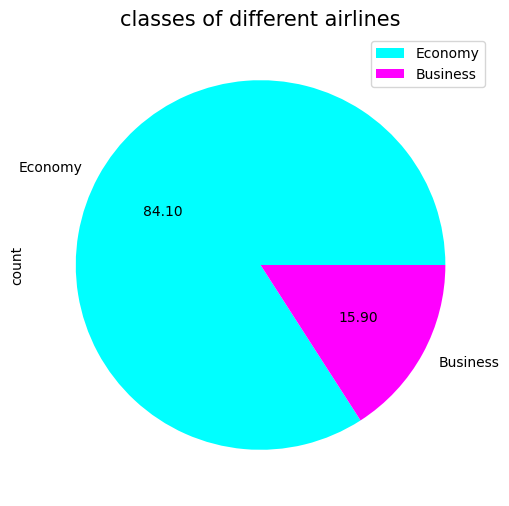

In [ ]:
plt.figure(figsize = (8,6))
df2['class'].value_counts().plot(kind='pie', textprops = {'color':'black'}, autopct = '%.2f', cmap = 'cool')
plt.title('classes of different airlines', fontsize = 15)
plt.legend(['Economy', 'Business'])
plt.show()

Does price vary with Airlines?

*   As we can see Vistara has Maximum Price range
*   Vistara and Air_India Airlines Have Maximum Price when compared to Others
*   SpiceJet , AirAsia , GO_First and Indigo has some what equal prices







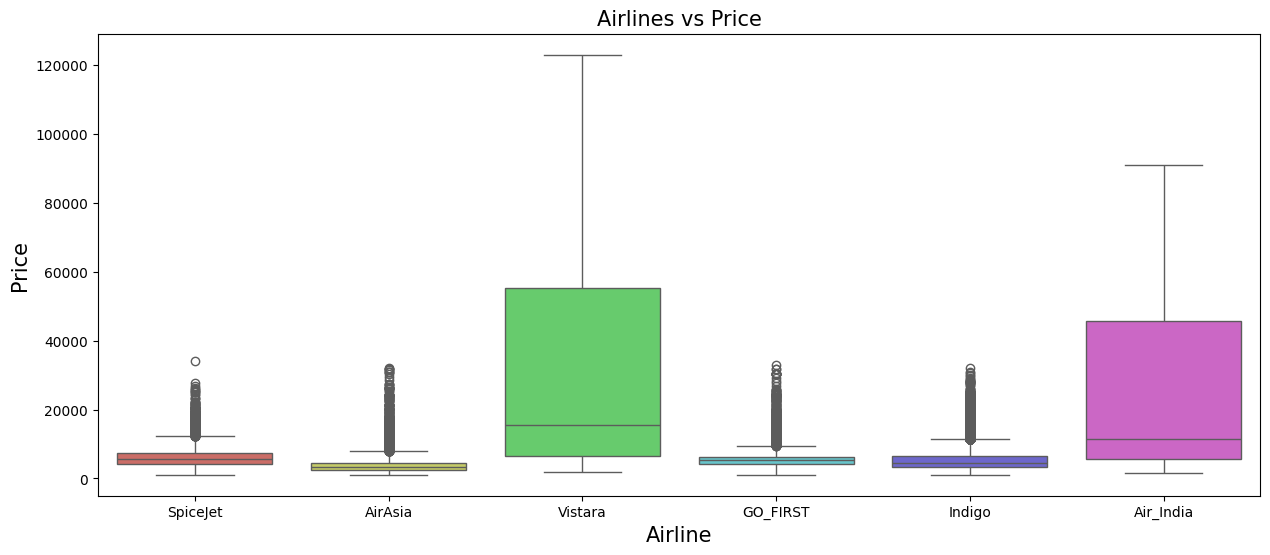

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x = df['airline'], y = df['price'], palette = 'hls')
plt.title('Airlines vs Price', fontsize = 15)
plt.xlabel('Airline', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.show()

How Does the Ticket Price vary between Economy and Business Class?

*   Ticket Price is Maximum for Bussiness Class When compared to Economy



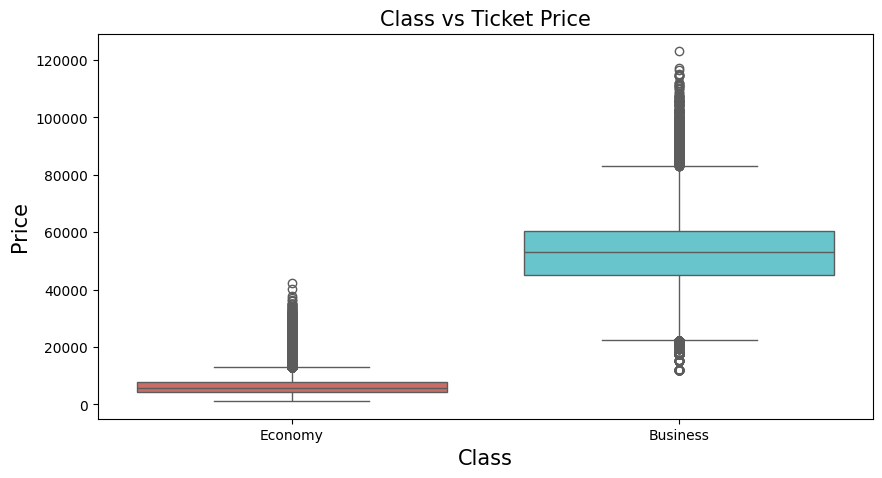

In [ ]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'class', y = 'price', data = df, palette = 'hls')
plt.title('Class vs Ticket Price', fontsize = 15)
plt.xlabel('Class', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.show()

How Does the Ticket Price vary with the number of stops of a Flight?

*   Flights having one stop has maximum ticket price



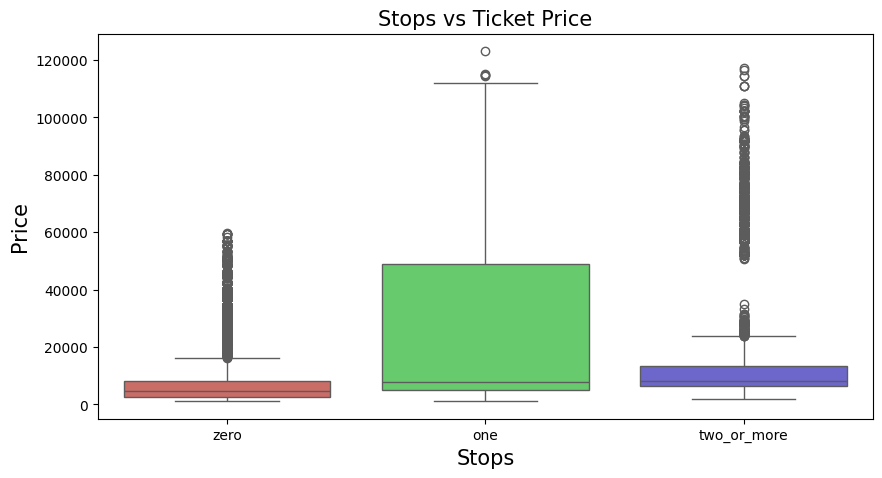

In [ ]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'stops', y = 'price', data = df, palette = 'hls')
plt.title('Stops vs Ticket Price', fontsize = 15)
plt.xlabel('Stops', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.show()

How the ticket price change based on the departure time and arrival time?

1.  Departure time vs Ticket price

*   Ticket price is more for the flights when the departure time is at night.
*   Ticket price is almost equal for flights having departure time at early_morning, morning and evening.
*   Ticket price is low for the flights having departure time at late_night.

2.   Arrival time vs Ticket price

*   Ticket price is more for the flights when the arrival time is at evening
*   Ticekt price is almost equal for flights having arrival time is at morning and night
*   Ticket price is low for the flights having arrival time at late_night as same as departure time

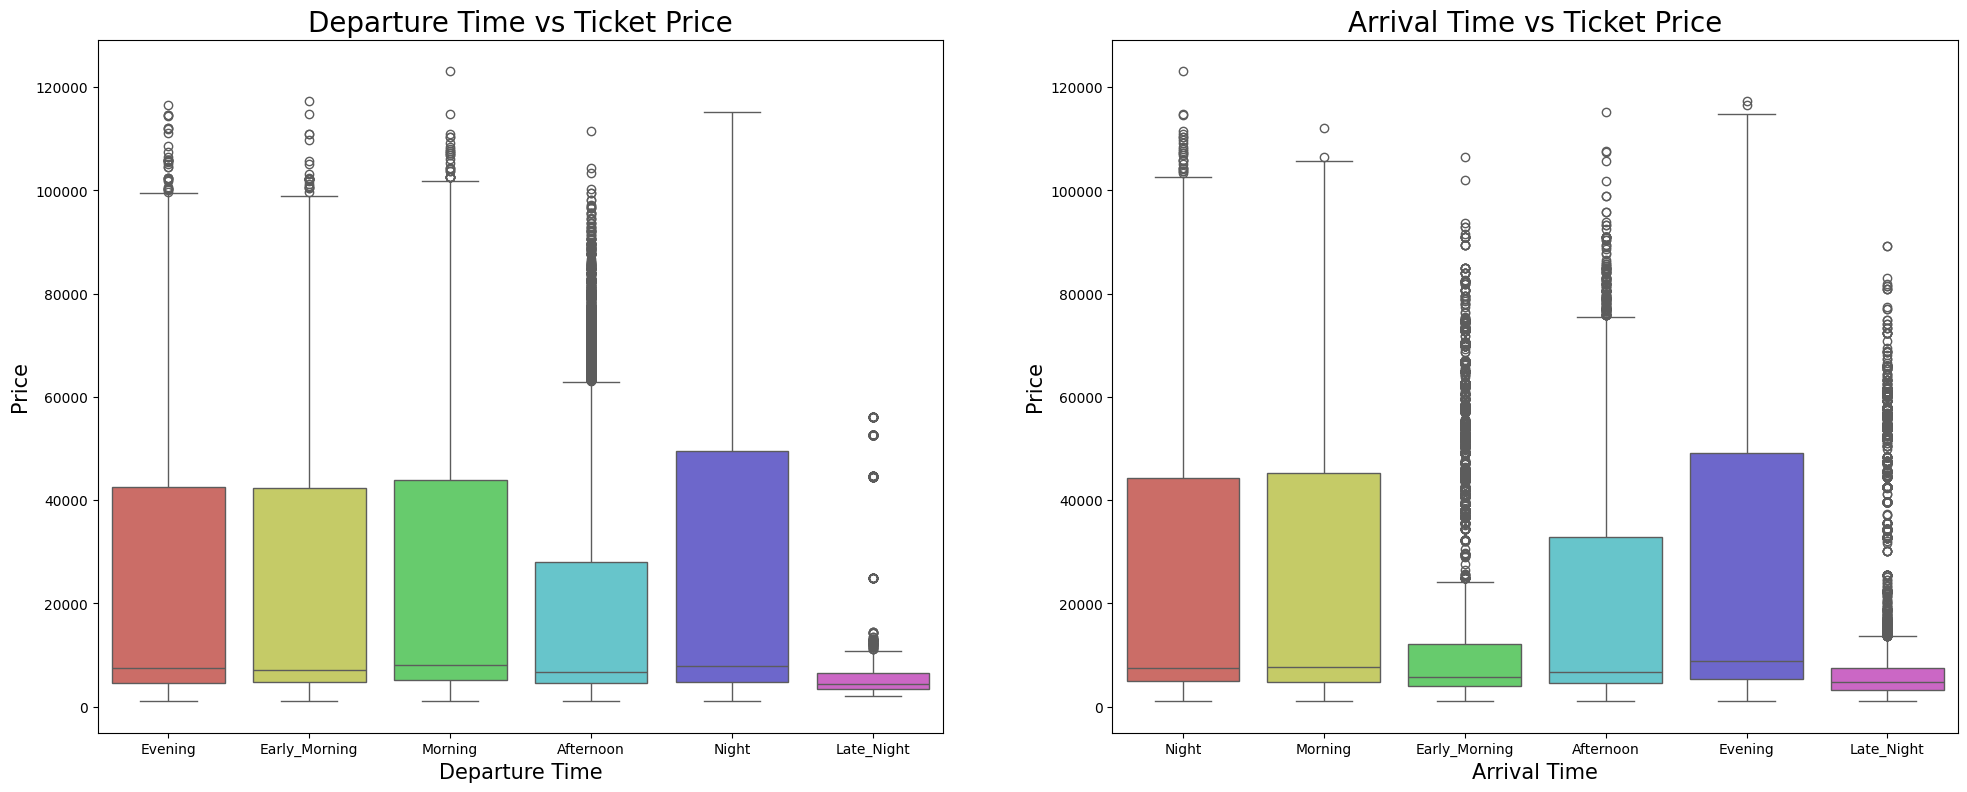

In [ ]:
plt.figure(figsize=(24, 9))
plt.subplot(1, 2, 1)
sns.boxplot(x = 'departure_time', y = 'price', data=df, palette = 'hls')
plt.title('Departure Time vs Ticket Price', fontsize = 20)
plt.xlabel('Departure Time', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.subplot(1, 2, 2)
sns.boxplot(x = 'arrival_time', y = 'price', data=df, palette = 'hls')
plt.title('Arrival Time vs Ticket Price', fontsize = 20)
plt.xlabel('Arrival Time', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.show()

How the prices changes with change in source city and destination city?

1.  Source city vs Ticket price

*   Ticket price is more for the flights whose source city is kolkata.
*   Ticket price is almost equal for flights having source cities as mumbai and chennai, hyderabad and bangalore.
*   Ticket price is low for the flights having source city as delhi.

2.   Destination city vs Ticket price

*   Ticket price is more for the flights whose destination city is kolkata and chennai.
*   Ticket price is almost equal for fligts having destination cities as mumbai and bangalore.
*   Ticket price is low for the flights having destination city as delhi.

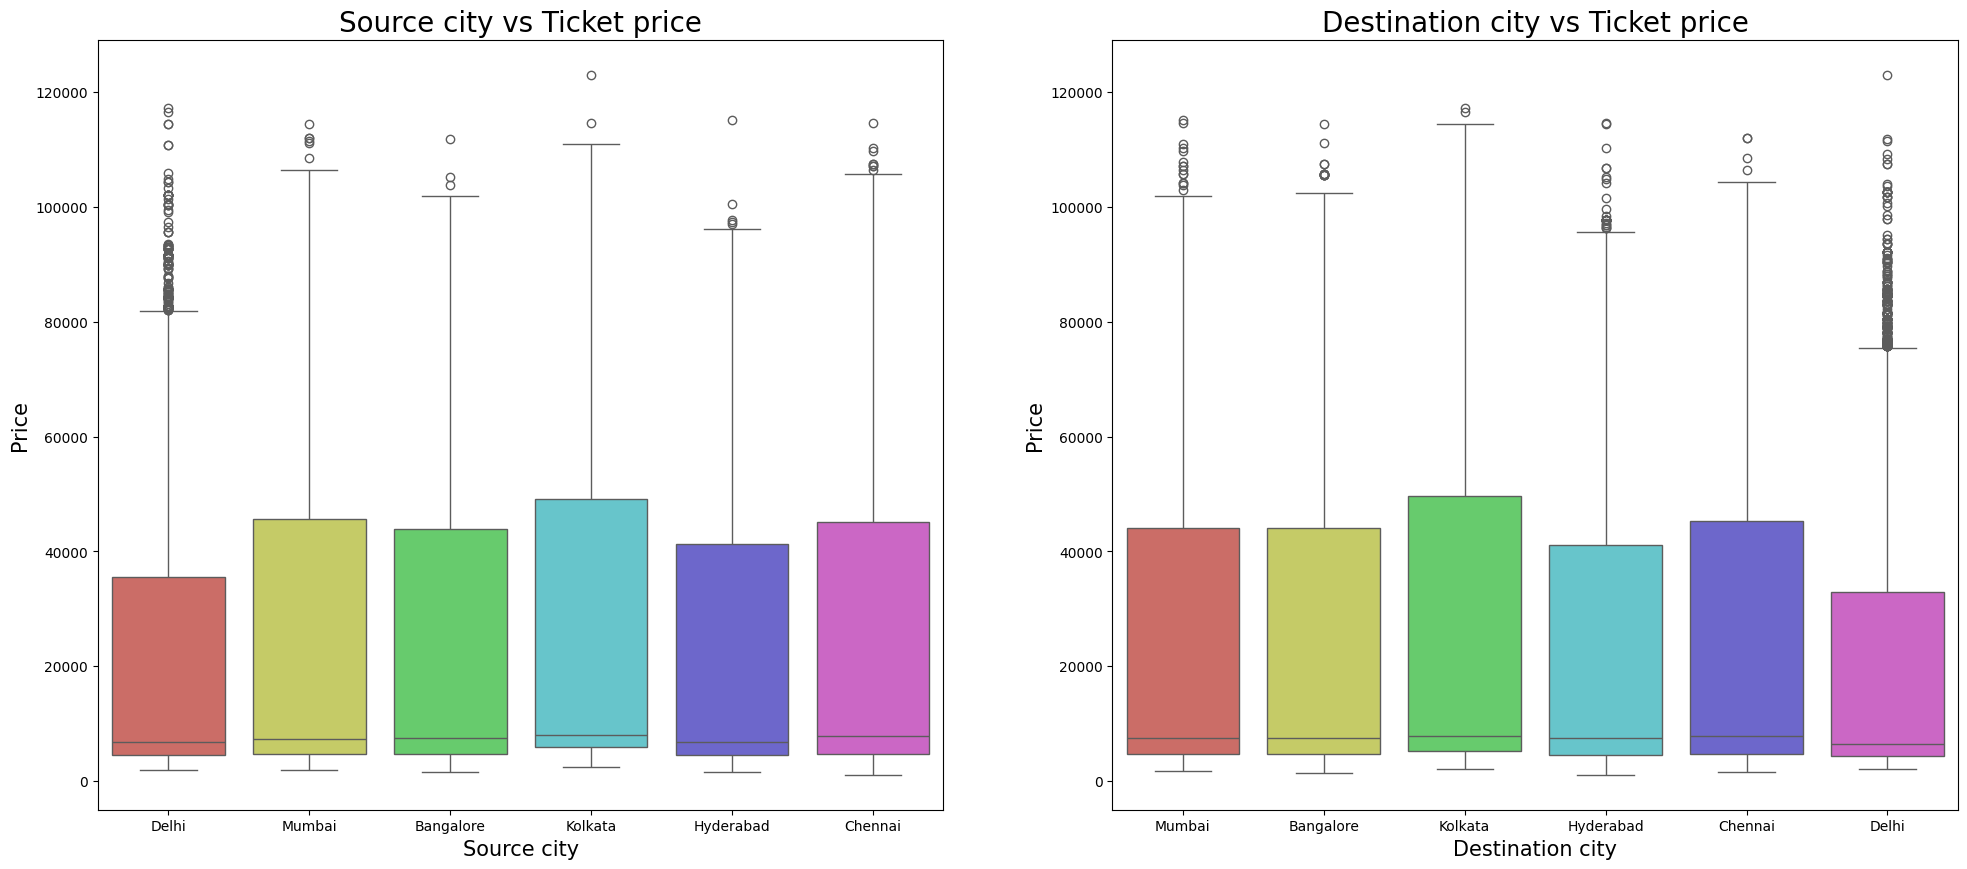

In [ ]:
plt.figure(figsize = (24, 10))
plt.subplot(1, 2, 1)
sns.boxplot(x = 'source_city', y = 'price', data=df, palette = 'hls')
plt.title('Source city vs Ticket price', fontsize = 20)
plt.xlabel('Source city', fontsize = 15)
plt.ylabel('Price', fontsize = 15)

plt.subplot(1, 2, 2)
sns.boxplot(x = 'destination_city', y = 'price', data=df, palette = 'hls')
plt.title('Destination city vs Ticket price', fontsize = 20)
plt.xlabel('Destination city', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.show()